In [139]:
from tarfile import data_filter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
data = pd.read_csv('benchmark/benchmark_results.csv')
data

,model,max_rounds,duration_sec,prompt_tokens,completion_tokens,success,debate_duration_sec,consensus,commands
0,gpt-4o-mini,2,44.83,16909,4369,True,42.20,0,5
1,gpt-4o-mini,2,32.84,19651,4940,True,30.27,0,6
2,gpt-4o-mini,2,34.75,19027,4389,True,31.64,0,7
3,gpt-4o-mini,2,31.07,20353,4982,True,27.67,0,4
4,gpt-4o-mini,2,31.07,19550,4644,True,28.49,0,6
5,gpt-4o-mini,2,35.42,16615,4103,True,32.66,0,10
6,gpt-4o-mini,2,36.59,19656,4389,True,34.38,0,7
7,gpt-4o-mini,2,31.37,16423,3959,True,29.23,0,13
8,gpt-4o-mini,2,37.69,19376,5337,True,34.49,0,7
9,gpt-4o-mini,2,51.71,20135,5385,True,49.53,0,8


In [141]:
# Add money columns
gpt4omini_input_price = 0.15 / 1000000 # $
gpt4omini_output_price = 0.6 / 1000000 # $

o3mini_input_price = 1.1 / 1000000 # $
o3mini_output_price = 4.4 / 1000000 # $

data['input_price'] = data.apply(lambda row: row['prompt_tokens'] * gpt4omini_input_price if row['model'] == 'gpt-4o-mini' else row['prompt_tokens'] * o3mini_input_price, axis=1)
data['output_price'] = data.apply(lambda row: row['completion_tokens'] * gpt4omini_output_price if row['model'] == 'gpt-4o-mini' else row['completion_tokens'] * o3mini_output_price, axis=1)
data['price'] = data.apply(lambda row: row['input_price'] + row['output_price'], axis=1)

data

,model,max_rounds,duration_sec,prompt_tokens,completion_tokens,success,debate_duration_sec,consensus,commands,input_price,output_price,price
0,gpt-4o-mini,2,44.83,16909,4369,True,42.20,0,5,0.002536,0.002621,0.005158
1,gpt-4o-mini,2,32.84,19651,4940,True,30.27,0,6,0.002948,0.002964,0.005912
2,gpt-4o-mini,2,34.75,19027,4389,True,31.64,0,7,0.002854,0.002633,0.005487
3,gpt-4o-mini,2,31.07,20353,4982,True,27.67,0,4,0.003053,0.002989,0.006042
4,gpt-4o-mini,2,31.07,19550,4644,True,28.49,0,6,0.002932,0.002786,0.005719
5,gpt-4o-mini,2,35.42,16615,4103,True,32.66,0,10,0.002492,0.002462,0.004954
6,gpt-4o-mini,2,36.59,19656,4389,True,34.38,0,7,0.002948,0.002633,0.005582
7,gpt-4o-mini,2,31.37,16423,3959,True,29.23,0,13,0.002463,0.002375,0.004839
8,gpt-4o-mini,2,37.69,19376,5337,True,34.49,0,7,0.002906,0.003202,0.006109
9,gpt-4o-mini,2,51.71,20135,5385,True,49.53,0,8,0.003020,0.003231,0.006251


In [142]:
data['avg_prompt_tokens_per_round'] = data['prompt_tokens'] / data['max_rounds']
avg_prompt_tokens_per_round = data['avg_prompt_tokens_per_round'].mean()
avg_prompt_tokens_per_round

25663.489444444444

In [143]:
data_gpt4omini = data[data['model'] == 'gpt-4o-mini'].copy()
data_mr4 = data[data['max_rounds'] == 4].copy()

In [144]:
data_gpt4omini['avg_debate_duration_sec_per_round'] = data_gpt4omini['debate_duration_sec'] / data_gpt4omini['max_rounds']
avg_debate_duration_sec_per_round = data_gpt4omini['avg_debate_duration_sec_per_round'].mean()
avg_debate_duration_sec_per_round

21.449613333333335

In [145]:
data_grouped = data.groupby(['model', 'max_rounds'])
data_grouped_avg = data_grouped[['debate_duration_sec', 'completion_tokens', 'prompt_tokens', 'price', 'commands']].mean().round(2)
data_grouped_avg

debate_duration_sec  completion_tokens  prompt_tokens  \
model       max_rounds                                                          
gpt-4o-mini 2                         34.06             4649.7        18769.5   
            3                         70.44             9552.9        56708.9   
            4                         83.13            13890.7       110301.1   
            5                        102.34            17989.2       160025.6   
            8                        203.93            28306.5       275505.8   
o3-mini     4                        202.24            49748.1       126698.4   

                        price  commands  
model       max_rounds                   
gpt-4o-mini 2            0.01       7.3  
            3            0.01       6.9  
            4            0.02       8.0  
            5            0.03       7.2  
            8            0.06       8.8  
o3-mini     4            0.36       4.7

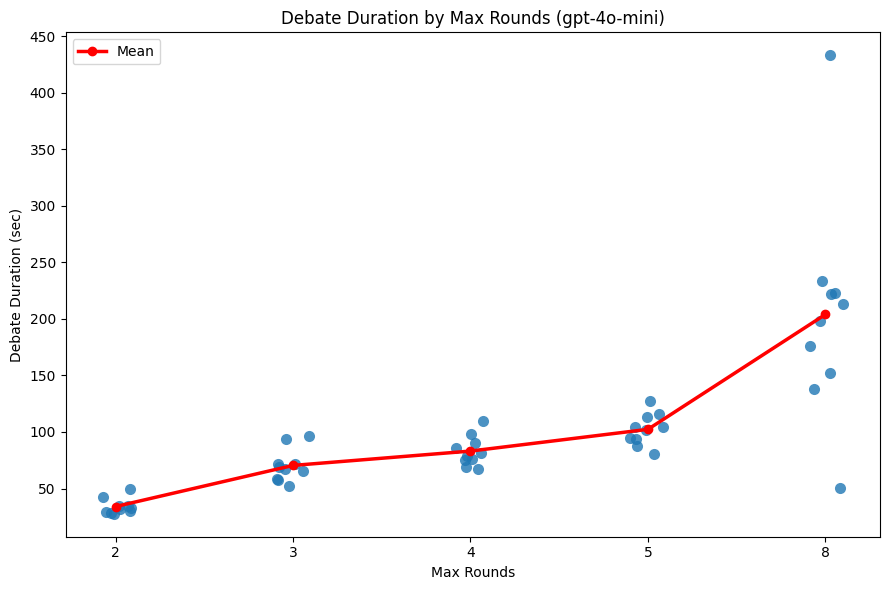

In [146]:
data_sorted = data_gpt4omini.sort_values('max_rounds')
data_gpt4omini_means = data_gpt4omini.groupby('max_rounds')['debate_duration_sec'].mean().reset_index()

# Categorical values
data_gpt4omini['max_rounds_str'] = data_gpt4omini['max_rounds'].astype(str)
data_gpt4omini_means['max_rounds_str'] = data_gpt4omini_means['max_rounds'].astype(str)

plt.figure(figsize=(9, 6))
sns.stripplot(data=data_gpt4omini, x='max_rounds_str', y='debate_duration_sec',
                size=8, jitter=True, alpha=0.8, zorder=1)

plt.plot(data_gpt4omini_means['max_rounds_str'], data_gpt4omini_means['debate_duration_sec'],
         marker='o', color='red', linestyle='-', label='Mean', zorder=2, linewidth=2.5)

plt.xlabel('Max Rounds')
plt.ylabel('Debate Duration (sec)')
plt.title('Debate Duration by Max Rounds (gpt-4o-mini)')
plt.legend()
plt.tight_layout()
plt.savefig('graphs/round_time.jpg', dpi=150)

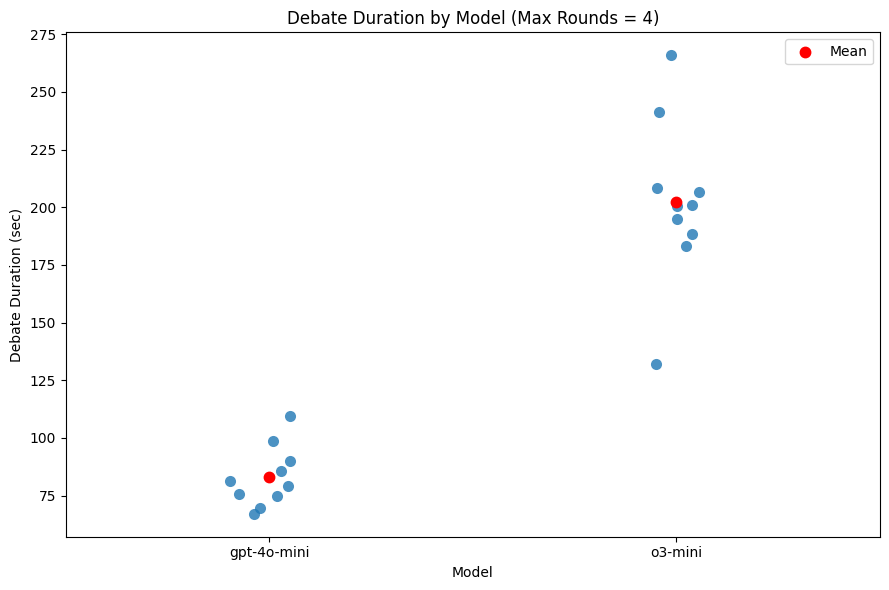

In [147]:
data_mr4_means = data_mr4.groupby('model')['debate_duration_sec'].mean().reset_index()

plt.figure(figsize=(9, 6))

sns.stripplot(data=data_mr4, x='model', y='debate_duration_sec',
              size=8, jitter=True, alpha=0.8, zorder=1)

plt.scatter(data_mr4_means['model'], data_mr4_means['debate_duration_sec'],
         marker='o', color='red', linestyle='-', label='Mean', zorder=2, linewidth=2.5)

plt.title('Debate Duration by Model (Max Rounds = 4)')
plt.xlabel('Model')
plt.ylabel('Debate Duration (sec)')

plt.xlim(-0.5, len(data_mr4_means['model'].unique()) - 0.5)

plt.legend()
plt.tight_layout()
plt.savefig('graphs/model_time.jpg', dpi=150)

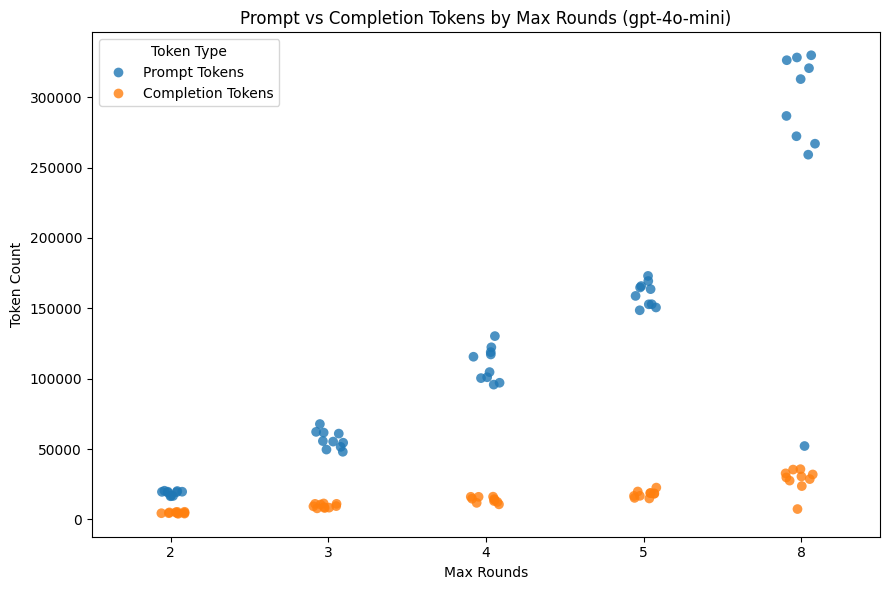

In [148]:
tokens_long = data_gpt4omini.melt(
    id_vars='max_rounds',
    value_vars=['prompt_tokens', 'completion_tokens'],
    var_name='Token Type',
    value_name='Tokens'
)

tokens_long['Token Type'] = tokens_long['Token Type'].replace({
    'prompt_tokens': 'Prompt Tokens',
    'completion_tokens': 'Completion Tokens'
})

plt.figure(figsize=(9, 6))
sns.stripplot(data=tokens_long, x='max_rounds', y='Tokens',
              hue='Token Type', jitter=True, size=7, alpha=0.8)

plt.title('Prompt vs Completion Tokens by Max Rounds (gpt-4o-mini)')
plt.xlabel('Max Rounds')
plt.ylabel('Token Count')
plt.legend(title='Token Type')
plt.tight_layout()
plt.savefig('graphs/round_tokens.jpg', dpi=150)

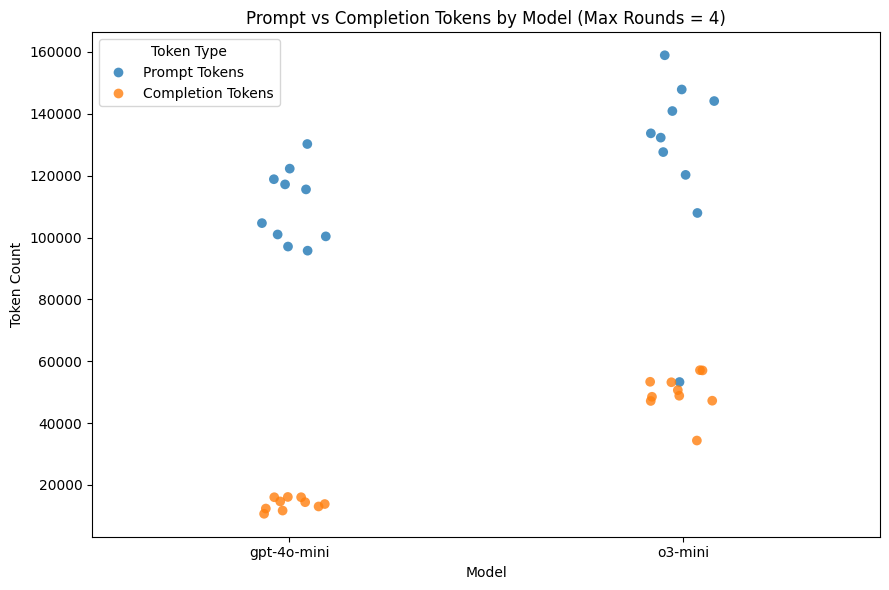

In [149]:
tokens_long = data_mr4.melt(
    id_vars='model',
    value_vars=['prompt_tokens', 'completion_tokens'],
    var_name='Token Type',
    value_name='Tokens'
)

tokens_long['Token Type'] = tokens_long['Token Type'].replace({
    'prompt_tokens': 'Prompt Tokens',
    'completion_tokens': 'Completion Tokens'
})

plt.figure(figsize=(9, 6))
sns.stripplot(data=tokens_long, x='model', y='Tokens',
              hue='Token Type', jitter=True, size=7, alpha=0.8)

plt.title('Prompt vs Completion Tokens by Model (Max Rounds = 4)')
plt.xlabel('Model')
plt.ylabel('Token Count')
plt.legend(title='Token Type')
plt.tight_layout()
plt.savefig('graphs/model_tokens.jpg', dpi=150)

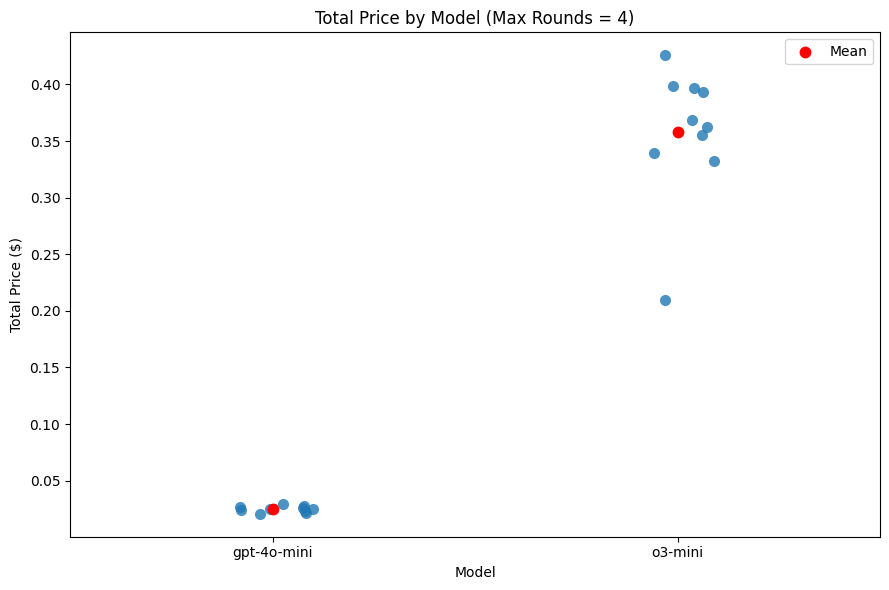

In [150]:
data_mr4_means_price = data_mr4.groupby('model')['price'].mean().reset_index()

plt.figure(figsize=(9, 6))

sns.stripplot(data=data_mr4, x='model', y='price',
              size=8, jitter=True, alpha=0.8, zorder=1)

plt.scatter(data_mr4_means_price['model'], data_mr4_means_price['price'],
         marker='o', color='red', linestyle='-', label='Mean', zorder=2, linewidth=2.5)

plt.title('Total Price by Model (Max Rounds = 4)')
plt.xlabel('Model')
plt.ylabel('Total Price ($)')

plt.xlim(-0.5, len(data_mr4_means['model'].unique()) - 0.5)

plt.legend()
plt.tight_layout()
plt.savefig('graphs/model_price.jpg', dpi=150)

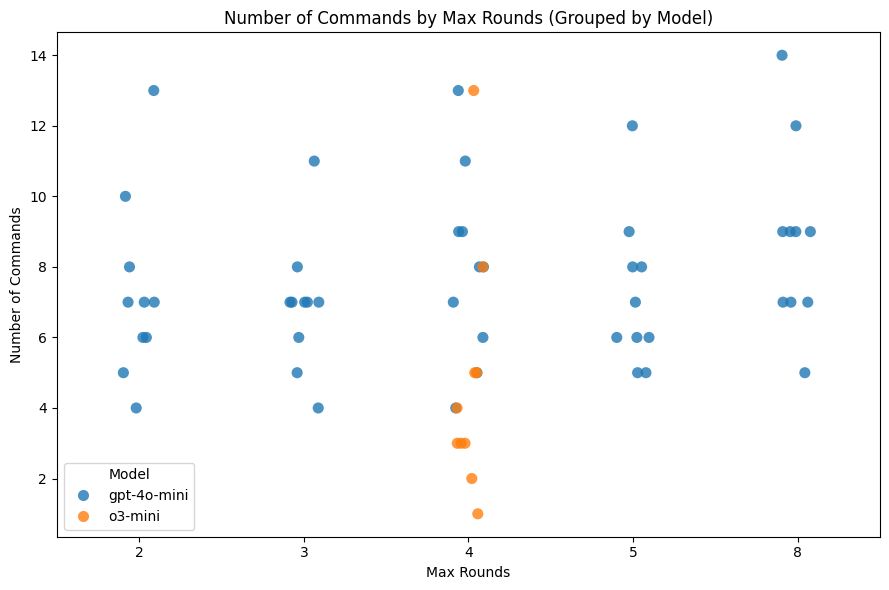

In [151]:
plt.figure(figsize=(9, 6))

sns.stripplot(data=data, x='max_rounds', y='commands', hue='model', jitter=True, size=8, alpha=0.8)

plt.title('Number of Commands by Max Rounds (Grouped by Model)')
plt.xlabel('Max Rounds')
plt.ylabel('Number of Commands')

plt.legend(title='Model')
plt.tight_layout()
plt.savefig('graphs/round_command.jpg', dpi=150)